In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [2]:
data = pd.read_csv("./train.csv")
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
data.shape,data.columns

((165034, 14),
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
        'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'))

In [31]:
X = data.iloc[:,1:13] 
X.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [7]:
len(X.CustomerId.unique()) 

23221

In [8]:
X.NumOfProducts.max(),X.NumOfProducts.min()#Use on hot encoder

(4, 1)

<Axes: xlabel='Exited', ylabel='Count'>

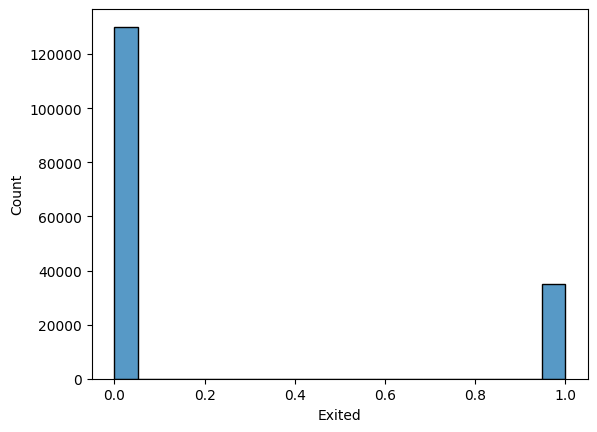

In [11]:
sns.histplot(data.Exited)

In [14]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [22]:
data['CustomerId'].nunique()

23221

In [32]:
ord = OrdinalEncoder()
X[['CustomerId','Surname']] = ord.fit_transform(X[['CustomerId','Surname']])
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,9815.0,1924.0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,16380.0,1925.0,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,12091.0,1178.0,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,15700.0,1299.0,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,18146.0,467.0,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [33]:
X.Tenure.max()

10

In [34]:
enc = OneHotEncoder(sparse_output= False)
cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
encoded_values = enc.fit_transform(X[cols])
enc.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([1, 2, 3, 4], dtype=int64),
 array([0., 1.]),
 array([0., 1.])]

In [37]:
OneHot_df = pd.DataFrame(encoded_values,columns=enc.get_feature_names_out(cols))
OneHot_df.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [39]:
X = pd.concat([X,OneHot_df],axis = 1) 
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,9815.0,1924.0,668,France,Male,33.0,3,0.00,2,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,16380.0,1925.0,627,France,Male,33.0,1,0.00,2,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,12091.0,1178.0,678,France,Male,40.0,10,0.00,2,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,15700.0,1299.0,581,France,Male,34.0,2,148882.54,1,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,18146.0,467.0,716,Spain,Male,33.0,5,0.00,2,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [47]:
X.drop('Surname',axis = 1,inplace= True)
X.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,668,33.0,3,0.00,181449.97,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,627,33.0,1,0.00,49503.50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,678,40.0,10,0.00,184866.69,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,581,34.0,2,148882.54,84560.88,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,716,33.0,5,0.00,15068.83,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [48]:
X.to_csv("X_train.csv",index = False)

In [58]:
test_data = pd.read_csv("test.csv")
X_train = test_data.iloc[:,3:13] 
X_train.columns, X_train.shape

(Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
       dtype='object'),
 (110023, 10))

In [59]:
encoded_values = enc.transform(X_train[cols])
OneHot_df = pd.DataFrame(encoded_values,columns=enc.get_feature_names_out(cols))
OneHot_df.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [60]:
X_train = pd.concat([X_train,OneHot_df],axis=1) 
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [61]:
X_train.drop(cols,inplace= True,axis = 1)

In [62]:
X_train

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,586,23.0,2,0.00,160976.75,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,683,46.0,2,0.00,72549.27,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,656,34.0,7,0.00,138882.09,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,681,36.0,8,0.00,113931.57,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,752,38.0,10,121263.62,139431.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,148087.62,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
110019,575,36.0,4,178032.53,42181.68,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
110020,712,31.0,2,0.00,16287.38,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
110021,709,32.0,3,0.00,158816.58,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [63]:
X

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,668,33.0,3,0.00,181449.97,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,627,33.0,1,0.00,49503.50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,678,40.0,10,0.00,184866.69,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,581,34.0,2,148882.54,84560.88,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,716,33.0,5,0.00,15068.83,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,131834.75,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
165030,792,35.0,3,0.00,131834.45,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
165031,565,31.0,5,0.00,127429.56,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
165032,554,30.0,7,161533.00,71173.03,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [64]:
X_train.to_csv("X_test.csv",index=False)

In [65]:
X.columns,data.columns

(Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
        'Geography_France', 'Geography_Germany', 'Geography_Spain',
        'Gender_Female', 'Gender_Male', 'NumOfProducts_1', 'NumOfProducts_2',
        'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_0.0', 'HasCrCard_1.0',
        'IsActiveMember_0.0', 'IsActiveMember_1.0'],
       dtype='object'),
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
        'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'))

In [3]:
import numpy as np
a = np.array([3,4,5])
b = np.array([4,5,6] )

np.sum(np.square(a-b))

3